# Cargado de librerias

In [1]:
import pandas as pd
import json
import numpy as np
import jellyfish

import matplotlib.pyplot as plt
import seaborn as sns

# Funciones para hacer cálculo estadístico
import statsmodels.api as sm
from statsmodels.formula.api import ols

# sklearn packages
from sklearn.preprocessing import StandardScaler # Análisis de PCA
from sklearn import metrics # Calcula métricas para un modelo
from sklearn import tree # Cálculo de decision trees
from sklearn.tree import DecisionTreeClassifier # Generación de modelos de decision tree
from sklearn.ensemble import BaggingClassifier # Generación de modelos de bagging
from sklearn.ensemble import RandomForestClassifier # Generación de modelo de random forest
from sklearn.ensemble import GradientBoostingRegressor # Generación de modelo de gradient boosting
from sklearn.ensemble import StackingRegressor # Generación de modelo de gradient boosting
from sklearn.model_selection import train_test_split # Hace split entre training y testing
from sklearn.model_selection import cross_validate # trains model with cross validation
from sklearn.model_selection import GridSearchCV # Optimización de hiperparámetros para un modelo
from sklearn.preprocessing import OneHotEncoder # One Hot encoding de las variables categóricas
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from imblearn.ensemble import BalancedRandomForestClassifier
# Catboost & shap 
import catboost
import shap
# print the JS visualization code to the notebook 
shap.initjs()

# Confusion matrix viz
from mlxtend.evaluate import confusion_matrix # Calcula la matriz de confusion 
from mlxtend.plotting import plot_confusion_matrix #plot de la matriz de confusión

# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore') #ignora los errores en el notebook


from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Cargado de dataset

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# raw_data = pd.read_csv('drive/MyDrive/683.csv', delimiter = ',',index_col=0).fillna(0)
# df = raw_data
# df

In [2]:
raw_data = pd.read_csv(r'C:\Users\nelna\OneDrive\Alejandro Cookbook\Analisis de datos\Allianz\Datathon_Allianz-main\Datathon\FINALs.csv', delimiter = ',',index_col=0).fillna(0)
# raw_data = pd.read_csv(r'C:\Users\Usuario\OneDrive\Salle\MD000 Treball fi de grau\1.- Data\dataset 4\682.csv', delimiter = ',',index_col=0).fillna(0)
df = raw_data
df

,Unnamed: 0.1,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,ID,Target,ADDRESS
160,160,F,N,Y,0.0,112500.0,NoIndica,NoIndica,Married,House / apartment,365243.0,0.0,NoIndica,2.0,12/01/1962,5008974,1.0,"05701, VT, 57 Pierpoint Avenue"
161,161,F,N,Y,0.0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243.0,0.0,NoIndica,2.0,12/01/1962,5008975,0.0,"31322, GA, 182 Regency Circle"
162,162,F,N,Y,0.0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243.0,0.0,NoIndica,2.0,12/01/1962,5008976,0.0,"240 54th Avenue North, 37209, TN"
163,163,F,N,Y,0.0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243.0,0.0,NoIndica,2.0,12/01/1962,5008977,1.0,"73034, OK, 6500 Thurlow Place"
164,164,F,N,Y,0.0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243.0,0.0,NoIndica,2.0,12/01/1962,5008978,0.0,"8506 Laviento Drive, 99515, AK"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438984,438984,F,Y,N,0.0,202500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,365243.0,0.0,NoIndica,2.0,16/05/1966,6153774,0.0,"31404, GA, 88 Pine Valley Road"
439014,439014,F,N,Y,0.0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243.0,0.0,NoIndica,2.0,03/02/1958,5008977,1.0,"73034, OK, 6500 Thurlow Place"
439015,439015,F,N,Y,0.0,225000.0,Pensioner,Secondary / secondary special,Married,Municipal apartment,365243.0,0.0,NoIndica,2.0,22/06/1961,5008978,0.0,"8506 Laviento Drive, 99515, AK"
439029,439029,F,N,N,0.0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,365243.0,0.0,NoIndica,1.0,30/05/1969,5008995,1.0,"94702, CA, 1209 Parker Street"


In [3]:
df['weaponscores']=df['weaponscores'].replace(to_replace = ['HK416','AWM','Mini14','FNFal','UMP','Win1894','M24','AK47',
'L6','Vector','Vector C','Vector_C','M249'], value = 1 )
df['weaponscores']=df['weaponscores'].replace(to_replace = ['SCAR','SCAR L','SCAR-L','MP5K','BerylM762','BerylM762 C',
'BerylM762_C','Mosin','QBZ95','P90','Mk14','MG3 C','MG3_C','MG3','Mk12','Mk12 C','Mk12_C','QBU88','QBU88 C','QBU88_C',
'ACE32','Berreta686','UZI','UZI C','UZI_C','Kar98k','Thompson','Winchester','vz61Skorpion'], value = 0.5 )
df['weaponscores']=df['weaponscores'].replace(to_replace = ['M16A4 C','M16A4_C','M16A4','AUG','AUG C','AUG_C','Groza','Groza C',
'Groza_C','DP12 C','DP12','DP12_C','BizonPP19 C','BizonPP19','BizonPP19_C','Mk47Mutant','Mk47Mutant C','Mk47Mutant_C',
'VSS','VSS C','VSS_C','Crossbow_C','Crossbow_C','Crossbow','Pan','M9','BluezoneGrenade','C4','Cowbar','DP28',
'DesertEagle','Drone','FlashBang','G18','G36C','Grenade','JerryCan','K2','M1911','M79','Machete','Molotov','Mortar','MosinNagant',
'NagantM1895','PanzerFaust100M1', 'Rhino','SKS','Saiga12','Sawnoff','Sickle','SmokeBomb','SpikeTrap','SpotterScope',
'TacPack','TraumaBag','Win94'], value = 0.25 )
df['weaponscores']=df['weaponscores'].replace(to_replace = [np.NaN], value = 0 )
df['weaponscores']



data = df[['player', 'MatchId', 'accountId', 'dBNOId', 'distanceOnFoot',
       'distanceOnSwim', 'distanceOnVehicle', 'elapsedTime', 'isSuicide',
       'killCount', 'meanmobility', 'mobility', 'rank', 'teamId',
       'weaponscores', 'x_death', 'x_landing', 'y_death', 'y_landing',
       'z_death', 'z_landing', 'Nequipo', 'Premade', 'Col', 'weaponaccesory',
       'Leader', 'winner', 'mapName']]


data['mobility']=data['mobility']/1000000
data['meanmobility']=data['meanmobility']/1000000

top5 = []
top10 = []
for i in data['rank']:
    if ((i >= 1) & (i < 5)):
        top5.append(1)
        top10.append(1)
    elif ((i >= 5) & (i < 11)):
        top5.append(0)
        top10.append(1)
    else:
        top5.append(0)
        top10.append(1)

data['top5'] = top5
data['top10'] = top10

data.drop(['player'], axis=1, inplace=True)
data.drop(['MatchId'], axis=1, inplace=True)
data.drop(['accountId'], axis=1, inplace=True)
data.drop(['mapName'], axis=1, inplace=True)
data.drop(['rank'], axis=1, inplace=True)
data.drop(['dBNOId'], axis=1, inplace=True)
# data.drop([''], axis=1, inplace=True)
# data.drop([''], axis=1, inplace=True)
data['weaponscores'] = pd.to_numeric(data['weaponscores'])
data

,distanceOnFoot,distanceOnSwim,distanceOnVehicle,elapsedTime,isSuicide,killCount,meanmobility,mobility,teamId,weaponscores,...,z_death,z_landing,Nequipo,Premade,Col,weaponaccesory,Leader,winner,top5,top10
0,3307.190186,0.0,979.617981,1361.0,0.0,2.0,73.465283,120.159820,9.0,1.00,...,0.000000,169.384598,4,0.0,0,1,0,0,1,1
1,4178.567871,0.0,264.794403,1361.0,0.0,5.0,73.465283,0.122629,9.0,0.50,...,0.000000,603.703796,4,0.0,0,1,0,0,1,1
2,3052.078125,0.0,14.228850,1361.0,0.0,4.0,73.465283,17.263765,9.0,0.25,...,0.000000,1433.452271,4,0.0,0,1,0,1,1,1
3,4317.536621,0.0,0.000000,1361.0,0.0,6.0,73.465283,156.314917,9.0,1.00,...,0.000000,2106.803711,4,0.0,0,1,0,0,1,1
4,3893.840576,0.0,0.000000,1361.0,0.0,0.0,18.667664,0.075886,11.0,1.00,...,306.480011,1859.601562,4,0.0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27862,0.000000,0.0,0.000000,482.0,0.0,0.0,88.920840,0.096813,219.0,0.00,...,12389.792969,6727.340820,3,0.0,0,0,0,0,0,1
27863,0.000000,0.0,0.000000,482.0,0.0,0.0,88.920840,0.096813,219.0,0.00,...,12389.792969,6727.340820,3,0.0,0,0,0,0,0,1
27864,0.000000,0.0,0.000000,465.0,0.0,0.0,57.176586,0.085579,215.0,0.00,...,7092.350586,3084.492188,4,0.0,0,0,0,0,0,1
27865,0.000000,0.0,0.000000,465.0,0.0,0.0,57.176586,0.085579,215.0,0.00,...,7092.350586,3082.248779,4,0.0,0,0,0,0,0,1


In [4]:
X=data.drop('winner',axis=1)
Y=data['winner']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X).copy()
X_test_scaler = scaler.transform(X).copy()

In [22]:
# RandomForestClassifier
parameters = {
    'n_estimators': [1,5,10,20,50,100,200,300,400,500],
    'criterion' : ['entropy','gini', 'log_loss'],
    'max_depth': [ 11,5,10,15,20,25,30],
    'min_samples_split' : [25,30,35]
} #RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=30, n_estimators=300)
print("starting exhaustive search... (please wait)")
model = GridSearchCV( RandomForestClassifier(), param_grid=parameters, cv=2,n_jobs=-1, scoring='f1')
model.fit(X, Y)
print('Optimal parameter list:', model.best_params_)
print('Optimal model:', model.best_estimator_)
print('Optimal scores value (train):', model.best_score_) 
rf_best_model_cv = model.best_estimator_

starting exhaustive search... (please wait)
Optimal parameter list: {'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 25, 'n_estimators': 1}
Optimal model: RandomForestClassifier(max_depth=11, min_samples_split=25, n_estimators=1)
Optimal scores value (train): 0.474012415067529


# Iteración 1

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5446
           1       0.47      0.29      0.36       128

    accuracy                           0.98      5574
   macro avg       0.73      0.64      0.67      5574
weighted avg       0.97      0.98      0.97      5574



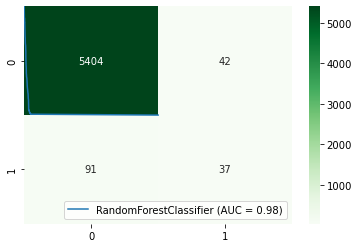

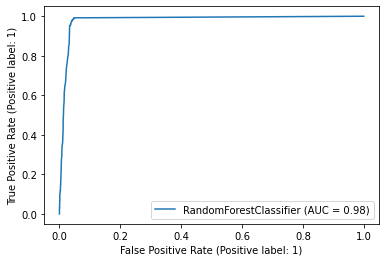

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)

# Iteracion 2

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5433
           1       0.58      0.29      0.39       141

    accuracy                           0.98      5574
   macro avg       0.78      0.64      0.69      5574
weighted avg       0.97      0.98      0.97      5574



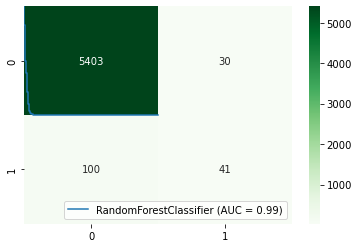

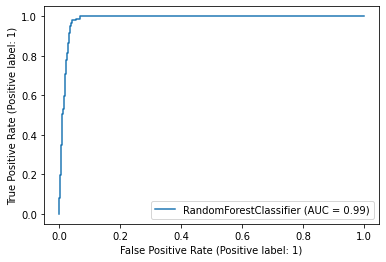

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
rf_model = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=30, n_estimators=300)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5418
           1       0.00      0.00      0.00       156

    accuracy                           0.97      5574
   macro avg       0.49      0.50      0.49      5574
weighted avg       0.94      0.97      0.96      5574



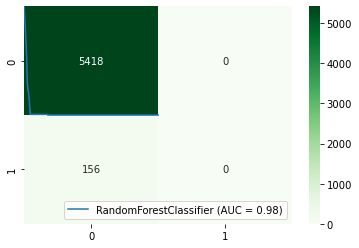

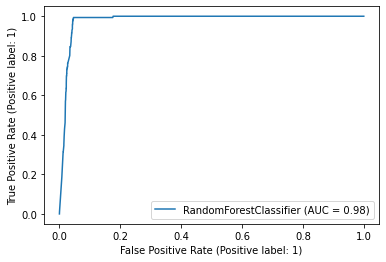

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
rf_model = RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_split=30, n_estimators=300)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5440
           1       0.56      0.18      0.27       134

    accuracy                           0.98      5574
   macro avg       0.77      0.59      0.63      5574
weighted avg       0.97      0.98      0.97      5574



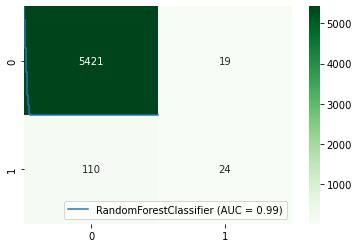

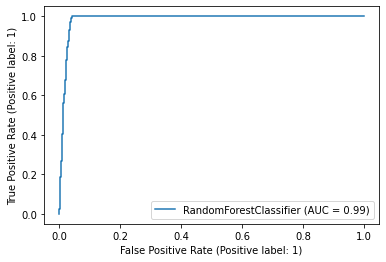

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
rf_model = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=30, n_estimators=300)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5435
           1       0.57      0.26      0.36       139

    accuracy                           0.98      5574
   macro avg       0.78      0.63      0.67      5574
weighted avg       0.97      0.98      0.97      5574



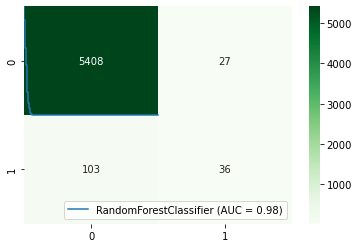

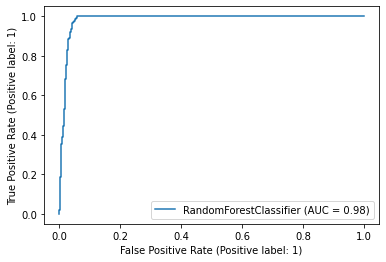

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
rf_model = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=30, n_estimators=300)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5438
           1       0.55      0.21      0.31       136

    accuracy                           0.98      5574
   macro avg       0.76      0.60      0.65      5574
weighted avg       0.97      0.98      0.97      5574



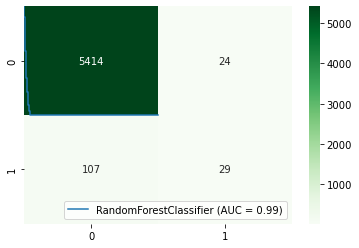

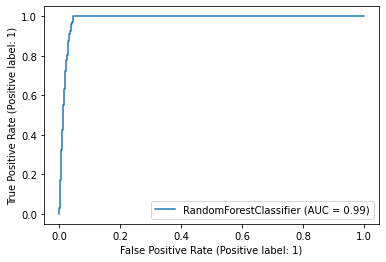

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
rf_model = RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_split=30, n_estimators=300)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5441
           1       0.46      0.27      0.34       133

    accuracy                           0.97      5574
   macro avg       0.72      0.63      0.66      5574
weighted avg       0.97      0.97      0.97      5574



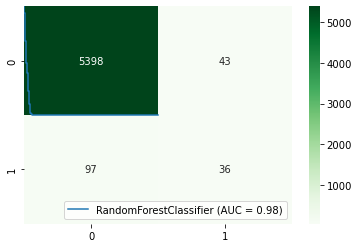

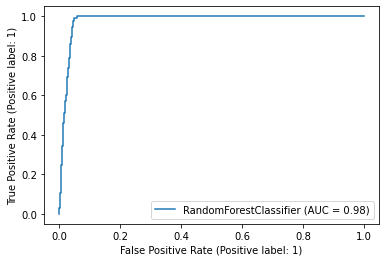

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
rf_model = RandomForestClassifier(criterion='entropy', max_depth=35, min_samples_split=30, n_estimators=300)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5426
           1       0.59      0.27      0.37       148

    accuracy                           0.98      5574
   macro avg       0.78      0.63      0.68      5574
weighted avg       0.97      0.98      0.97      5574



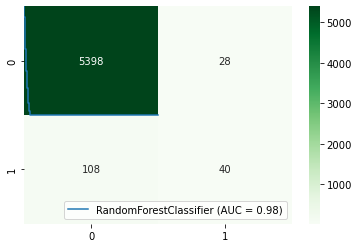

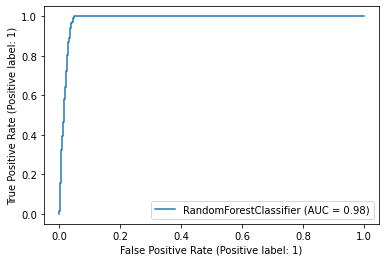

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
rf_model = RandomForestClassifier(criterion='entropy', max_depth=40, min_samples_split=30, n_estimators=300)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5422
           1       0.52      0.17      0.26       152

    accuracy                           0.97      5574
   macro avg       0.75      0.58      0.62      5574
weighted avg       0.96      0.97      0.97      5574



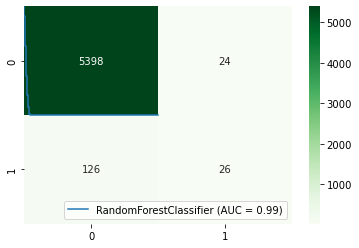

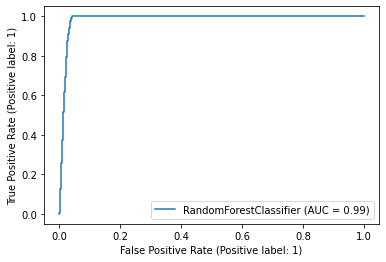

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
rf_model = RandomForestClassifier(criterion='entropy', max_depth=40, min_samples_split=30, n_estimators=300)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)

In [25]:
X=data.drop('winner',axis=1)
Y=data['winner']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X).copy()
X_test_scaler = scaler.transform(X).copy()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5433
           1       0.56      0.24      0.34       141

    accuracy                           0.98      5574
   macro avg       0.77      0.62      0.66      5574
weighted avg       0.97      0.98      0.97      5574



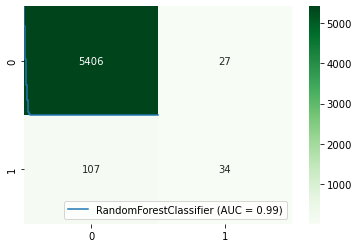

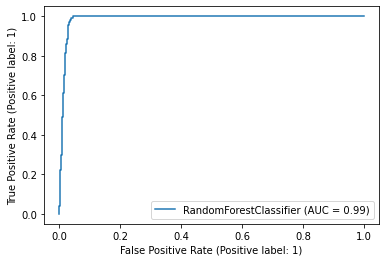

In [26]:

rf_model = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=30, n_estimators=300)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8150
           1       0.38      0.99      0.54       211

    accuracy                           0.96      8361
   macro avg       0.69      0.97      0.76      8361
weighted avg       0.98      0.96      0.97      8361



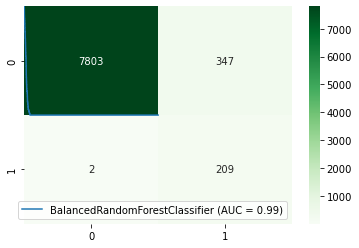

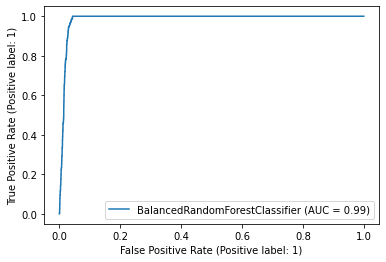

In [8]:

rf_model = BalancedRandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=30, n_estimators=300,random_state=42)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)

# Iteracion 3

In [16]:
# RandomForestClassifier
parameters = {
    'n_estimators': [1,5,10,20,50,100,200,300,400,500,700,1000],
    'criterion' : ['gini'],
    'max_depth': [ 11,5,10,15,20,25,30,40,50],

} #RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=30, n_estimators=300)
print("starting exhaustive search... (please wait)")
model = GridSearchCV( RandomForestClassifier(), param_grid=parameters, cv=2,n_jobs=-1, scoring='f1')
model.fit(X, Y)
print('Optimal parameter list:', model.best_params_)
print('Optimal model:', model.best_estimator_)
print('Optimal scores value (train):', model.best_score_) 
rf_best_model_cv = model.best_estimator_

starting exhaustive search... (please wait)
Optimal parameter list: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 1}
Optimal model: RandomForestClassifier(max_depth=10, n_estimators=1)
Optimal scores value (train): 0.43694840174934774


              precision    recall  f1-score   support

           0       0.97      1.00      0.99      8150
           1       0.00      0.00      0.00       211

    accuracy                           0.97      8361
   macro avg       0.49      0.50      0.49      8361
weighted avg       0.95      0.97      0.96      8361



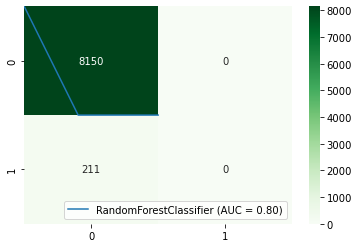

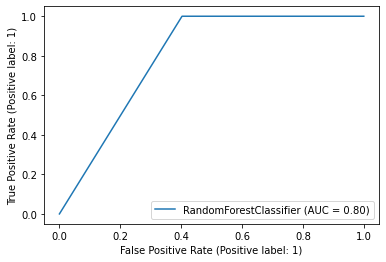

In [12]:

rf_model = RandomForestClassifier(criterion='gini', max_depth=1,  n_estimators=1)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8150
           1       0.61      0.20      0.30       211

    accuracy                           0.98      8361
   macro avg       0.79      0.60      0.65      8361
weighted avg       0.97      0.98      0.97      8361



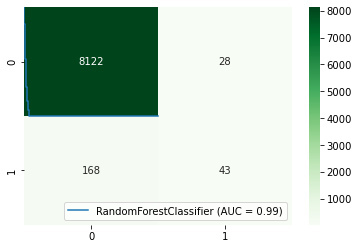

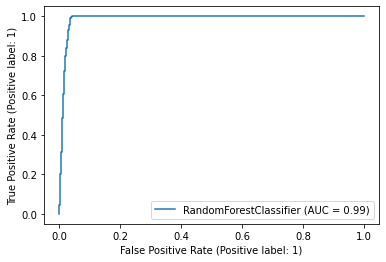

In [15]:

rf_model = RandomForestClassifier(criterion='gini', max_depth=10,  n_estimators=300)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8150
           1       0.43      0.19      0.27       211

    accuracy                           0.97      8361
   macro avg       0.71      0.59      0.63      8361
weighted avg       0.97      0.97      0.97      8361



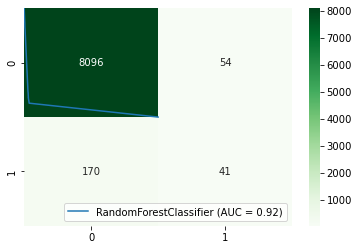

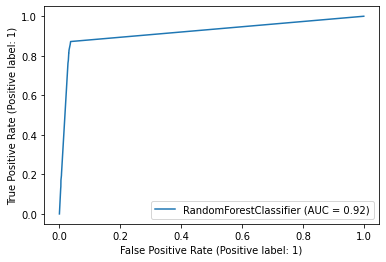

In [17]:
rf_model = RandomForestClassifier(criterion='gini', max_depth=10,  n_estimators=1)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)


In [18]:
# RandomForestClassifier
parameters = {
    'n_estimators': [1,5,10,20,50,100,200,300,400,500,700,1000],
    'criterion' : ['gini'],
    'max_depth': [ 11,5,10,15,20,25,30,40,50],

} #RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=30, n_estimators=300)
print("starting exhaustive search... (please wait)")
model = GridSearchCV( BalancedRandomForestClassifier(), param_grid=parameters, cv=2,n_jobs=-1, scoring='f1')
model.fit(X, Y)
print('Optimal parameter list:', model.best_params_)
print('Optimal model:', model.best_estimator_)
print('Optimal scores value (train):', model.best_score_) 
rf_best_model_cv = model.best_estimator_

starting exhaustive search... (please wait)
Optimal parameter list: {'criterion': 'gini', 'max_depth': 11, 'n_estimators': 10}
Optimal model: BalancedRandomForestClassifier(max_depth=11, n_estimators=10)
Optimal scores value (train): 0.5262214985640565


              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8150
           1       0.38      1.00      0.55       211

    accuracy                           0.96      8361
   macro avg       0.69      0.98      0.77      8361
weighted avg       0.98      0.96      0.97      8361



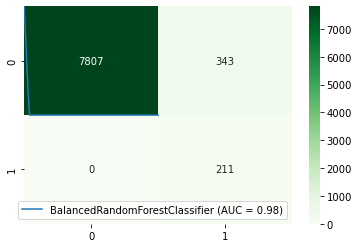

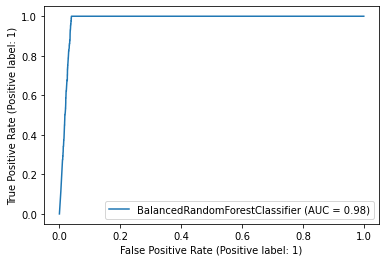

In [19]:
rf_model = BalancedRandomForestClassifier(criterion='gini', max_depth=11,  n_estimators=10)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5408
           1       0.53      0.36      0.43       166

    accuracy                           0.97      5574
   macro avg       0.76      0.68      0.71      5574
weighted avg       0.97      0.97      0.97      5574



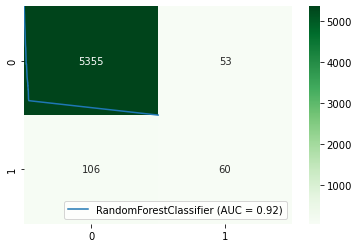

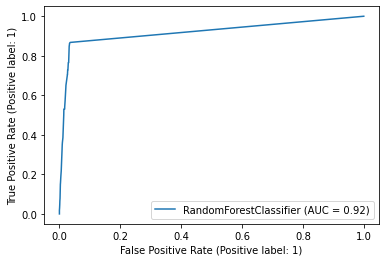

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
rf_model = RandomForestClassifier(criterion='gini', max_depth=11, min_samples_split=25, n_estimators=1)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

plot_roc_curve(rf_model,X_test, y_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True,cmap='Greens', fmt='g');
print(classification_report(y_test, predict))

plot_roc_curve(rf_model,X_test, y_test)



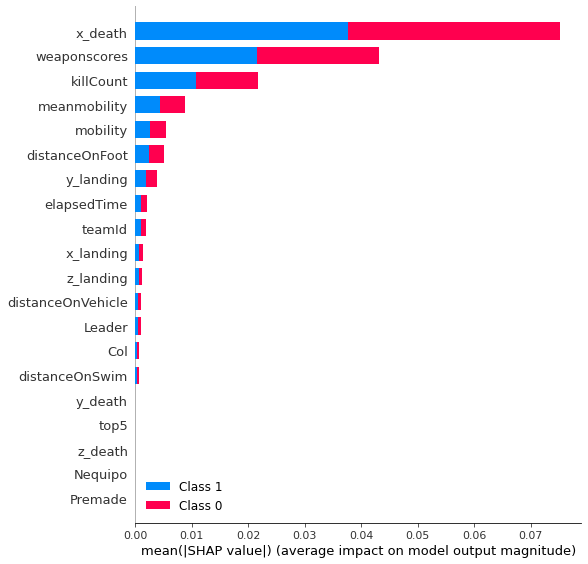

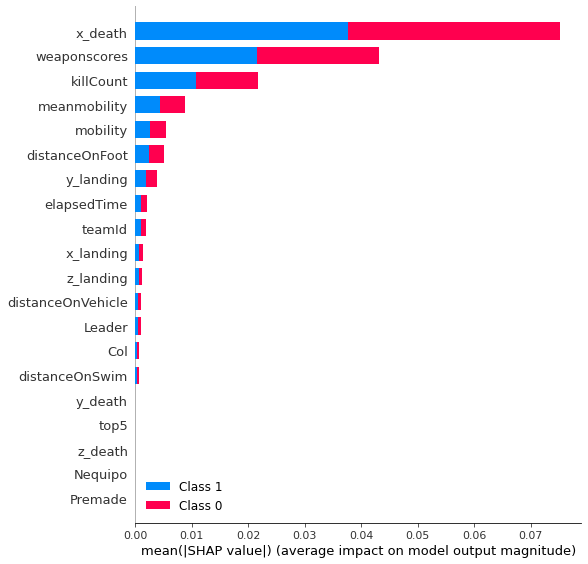

In [24]:
mappedrf = shap.TreeExplainer(rf_model)
shaps = mappedrf.shap_values(X_train)
shap.summary_plot(shaps, X_train)
shap.summary_plot(shaps, X_test)

In [25]:
# starting exhaustive search... (please wait)
# Optimal parameter list: {'criterion': 'log_loss', 'max_depth': 30, 'min_samples_split': 25, 'n_estimators': 10}
# Optimal model: RandomForestClassifier(criterion='log_loss', max_depth=30, min_samples_split=25,
#                        n_estimators=10)
# Optimal scores value (train): 0.44412704811817894

In [26]:
mappedrf = shap.TreeExplainer(rf_model)

In [27]:
shaps = mappedrf.shap_values(X_train)

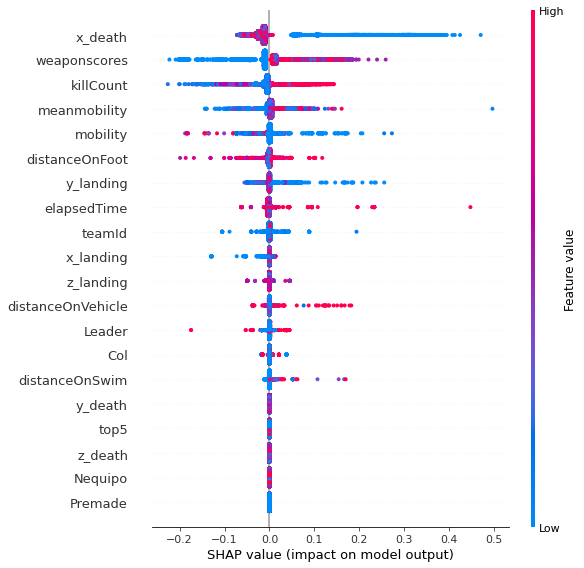

In [28]:
shap.summary_plot(shaps[1], X_train)

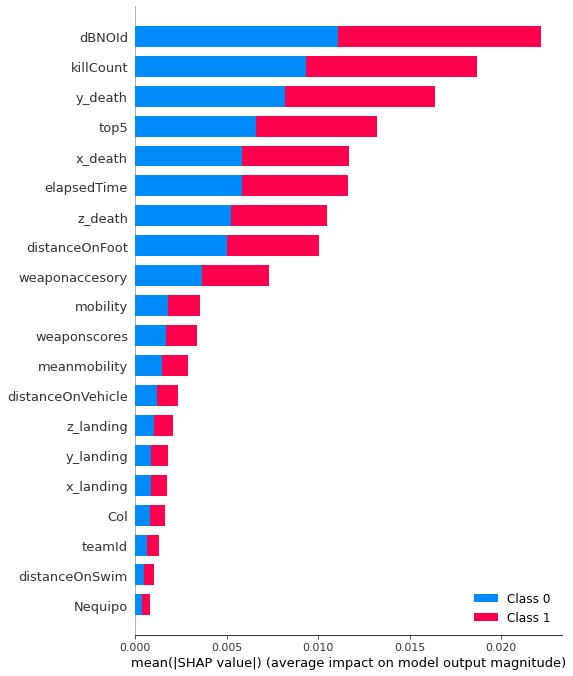

In [25]:
shap.summary_plot(shaps, X_train)

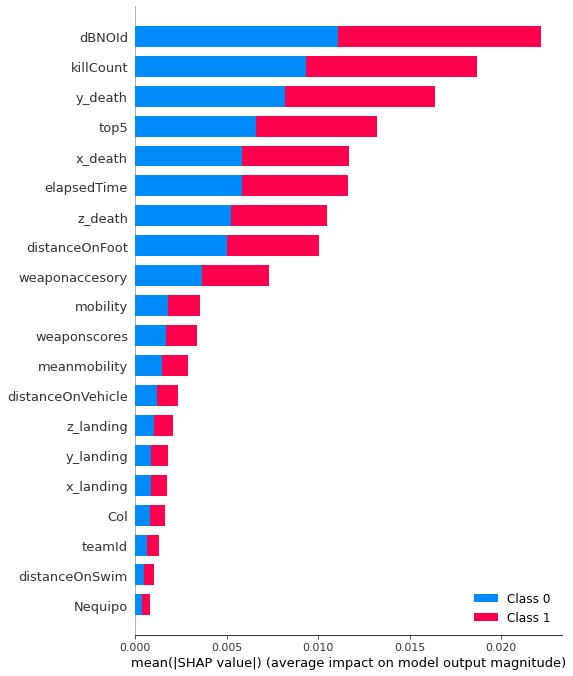

In [24]:
shap.summary_plot(shaps, X_test)

In [33]:
estimator = rf_model.estimators_[0]
estimator

DecisionTreeClassifier(max_depth=11, max_features='auto', min_samples_split=25,
                       random_state=1890599364)

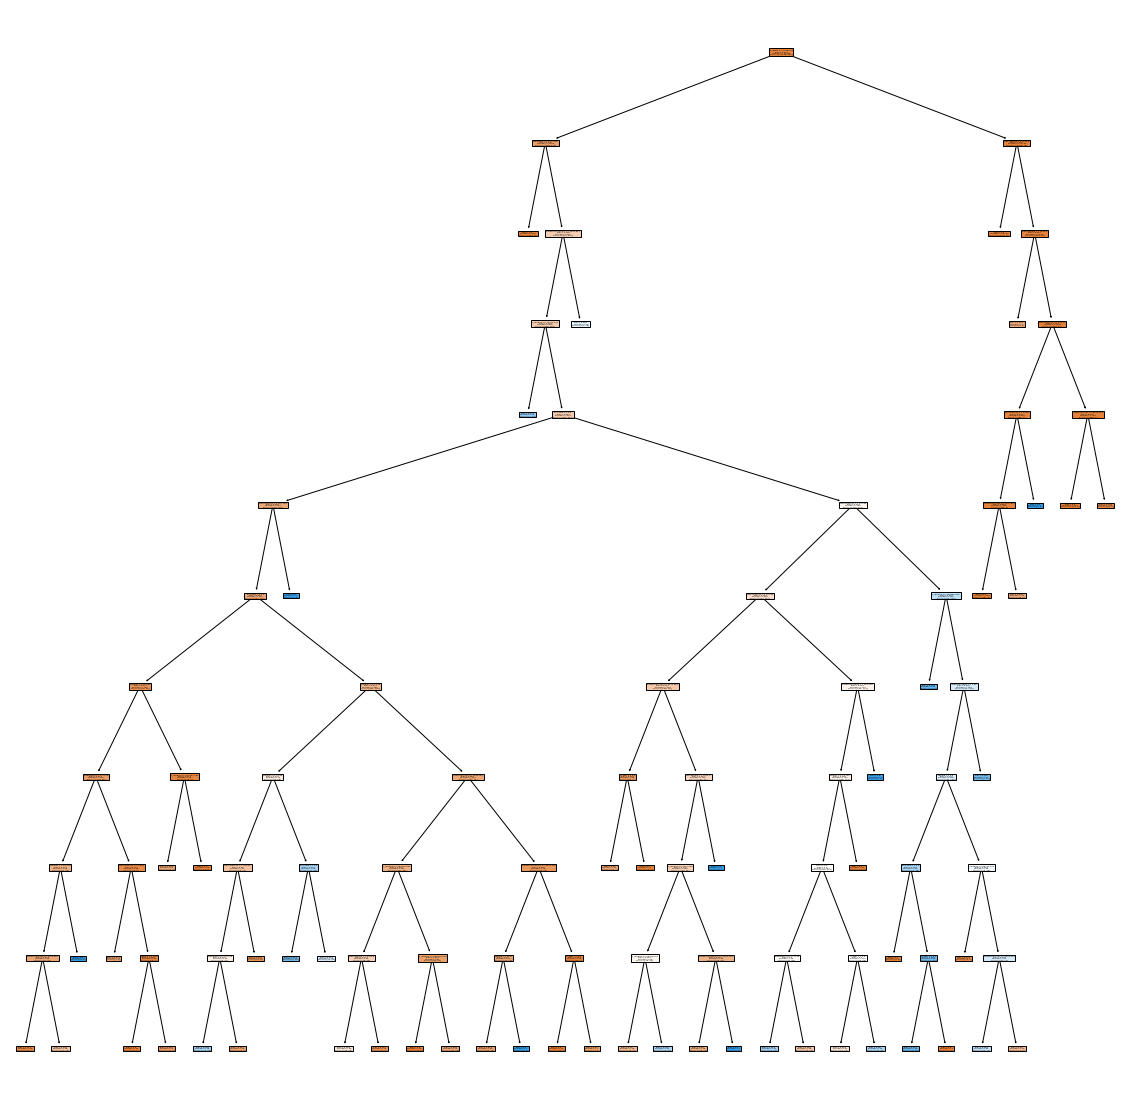

In [34]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf_model[0], feature_names=X.columns, filled=True)

In [38]:
pip install dtreeviz

  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=c56687f8c597987804db63f089efd7b11a1b4e20dd813f15ceeb1bf9764e1b18
  Stored in directory: c:\users\nelna\appdata\local\pip\cache\wheels\94\4d\ca\df6b7427d49df660c50c351242463476c3f7935c359402e42b
Successfully built dtreeviz
Note: you may need to restart the kernel to use updated packages.


In [41]:
from dtreeviz.trees import dtreeviz # will be used for tree visualization
viz = dtreeviz(rf_model[0], X_test, y_test, feature_names=X.columns, target_name="Target")
viz

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH